In [1]:
#ignore warning
import warnings
warnings.filterwarnings('ignore')

In [13]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import os

# set seaborn theme
sns.set_style(style="whitegrid")

In [64]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
%run Connect_Database.ipynb

Enter database password········
('INTC', 17.0, 4.0, 6.0, 7.0, datetime.datetime(2022, 2, 1, 0, 0), 'LAG_PERF', 'Semiconductors', 3.0, 31, 14.57, 'Customer Incidents,Business Ethics Incidents', 11.6, 21.21967741935484, 32.93, 2.53, 8.044999999999998, 16.08, 2.62, 6.166333333333333, 9.51, 4.79, 6.668666666666666, 9.67, 0.0, 1.1290322580645162, 4.0, 'None')


In [4]:
esg_info_df.dtypes

Ticker                                  object
totalScore                             float64
eScore                                 float64
sScore                                 float64
gScore                                 float64
lastRated                       datetime64[ns]
esgPerformance                          object
peerGroup                               object
highestControversy                     float64
peerCount                                int64
totalPercentile                        float64
relatedControversy                      object
minPeerESG                             float64
avgPeerESG                             float64
maxPeerESG                             float64
minPeerEnvironment                     float64
avgPeerEnvironment                     float64
maxPeerEnvironment                     float64
minPeerSocial                          float64
avgPeerSocial                          float64
maxPeerSocial                          float64
minPeerGovern

In [5]:
esg_info_df.isnull().sum()

Ticker                          0
totalScore                      0
eScore                          0
sScore                          0
gScore                          0
lastRated                       0
esgPerformance                  0
peerGroup                       0
highestControversy              0
peerCount                       0
totalPercentile                 0
relatedControversy              0
minPeerESG                      0
avgPeerESG                      0
maxPeerESG                      0
minPeerEnvironment              0
avgPeerEnvironment              0
maxPeerEnvironment              0
minPeerSocial                   0
avgPeerSocial                   0
maxPeerSocial                   0
minPeerGovernance               0
avgPeerGovernance               0
maxPeerGovernance               0
minHighestControversy           0
avgHighestControversy           0
maxHighestControversy           0
controversialBusinessAreas      0
Ticker_1                        0
longName      

In [12]:
esg_info_df.describe()

,totalScore,eScore,sScore,gScore,highestControversy,peerCount,totalPercentile,minPeerESG,avgPeerESG,maxPeerESG,...,bookValue,returnOnAssets,returnOnEquity,averageVolume,volume,currentPrice,fiftyTwoWeekLow,fiftyTwoWeekHigh,regularMarketPrice,marketCap
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,6.500000e+01,6.500000e+01,65.000000,65.000000,65.000000,65.000000,6.500000e+01
mean,20.644615,4.421538,9.304615,6.920000,2.415385,78.369231,28.754308,11.132462,22.865530,40.554462,...,43.130708,0.073398,0.472397,1.201343e+07,7.174082e+06,185.020345,150.741480,217.195670,185.017729,2.065353e+11
std,6.517405,4.835658,3.731640,2.252096,0.899519,40.450034,21.016613,3.227192,4.334667,11.695004,...,51.803482,0.052526,0.885982,2.037070e+07,1.153647e+07,163.240035,135.547904,198.739157,163.242271,4.481379e+11
min,9.400000,0.000000,2.600000,3.300000,0.000000,14.000000,1.880000,4.670000,14.254444,25.700000,...,-2.297000,0.009680,0.013680,4.597450e+05,3.361710e+05,16.470000,11.140000,17.760000,16.470000,7.937150e+09
25%,16.000000,0.800000,6.300000,5.600000,2.000000,54.000000,12.120000,9.450000,19.852697,31.670000,...,13.856000,0.029370,0.138380,2.089536e+06,1.453158e+06,68.790000,54.140000,80.290000,68.790000,4.052570e+10
50%,20.300000,2.500000,9.300000,6.200000,2.000000,83.000000,25.250000,11.060000,22.345690,35.480000,...,24.786000,0.063550,0.225220,3.853954e+06,2.240666e+06,136.460000,118.860000,167.060000,136.460000,9.964627e+10
75%,25.000000,7.500000,11.500000,8.000000,3.000000,105.000000,42.210000,11.600000,25.861807,48.860000,...,45.522000,0.096240,0.450950,1.071961e+07,6.263488e+06,238.790000,191.740000,272.810000,238.790000,2.054599e+11
max,36.400000,20.800000,18.000000,15.500000,5.000000,175.000000,81.210000,22.090000,30.502727,68.150000,...,275.256000,0.205530,6.578290,1.043990e+08,6.202308e+07,741.040000,662.260000,973.160000,741.040000,2.844308e+12


In [14]:
print(stats.skew(esg_info_df["totalScore"]))


0.32572850202813664


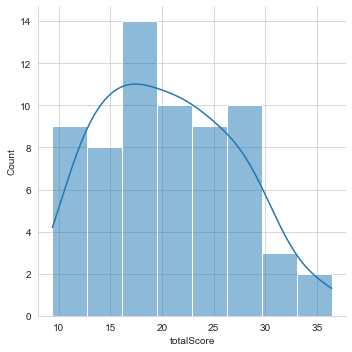

In [22]:
sns.displot(esg_info_df, x="totalScore", kind="hist", kde=True)

In [86]:
preferred_cols = ['eScore', 'sScore', 'gScore']

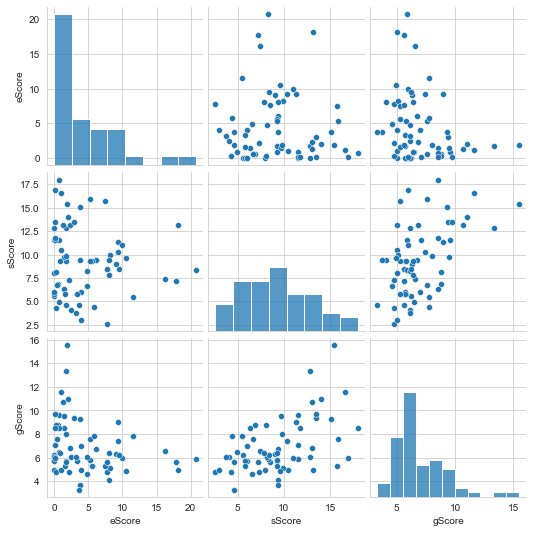

In [90]:
sns.pairplot(data=esg_info_df, vars=preferred_cols)

In [82]:
corr_value = esg_info_df["totalScore"].corr(esg_info_df["returnOnEquity"])

fig = px.scatter(
    data_frame=esg_info_df,
    x="totalScore",
    y="returnOnEquity",
#     marginal_x="histogram",
#     marginal_y="histogram",
    trendline="ols",
    trendline_color_override="red",
    title=f"Correlation between Total ESG Score and Return on Equity is: {corr_value:.2f}",
)

fig.show()

In [37]:
business_controversy_df.isnull().sum()

Ticker                  0
animalTesting           0
catholicValues          0
controversialWeapons    0
militaryContracting     0
None                    0
Nuclear                 0
smallArms               0
thermalCoal             0
dtype: int64

In [40]:
business_controversy_df.dtypes

Ticker                  object
animalTesting            int64
catholicValues           int64
controversialWeapons     int64
militaryContracting      int64
None                     int64
Nuclear                  int64
smallArms                int64
thermalCoal              int64
dtype: object

In [80]:
names = ['AnimalTesting', 'Catholic Values', 'Controversial Weapons',
       'Military Contracting', 'None', 'Nuclear', 'Small Arms', 'Thermal Coal']
values = [business_controversy_df['animalTesting'].sum() , business_controversy_df['catholicValues'].sum(), 
          business_controversy_df['controversialWeapons'].sum(),business_controversy_df['militaryContracting'].sum(), 
          business_controversy_df['None'].sum() ,business_controversy_df['Nuclear'].sum(),
          business_controversy_df['smallArms'].sum(),business_controversy_df['thermalCoal'].sum()]

# codebook_plotly_dapi.ipynb
fig = px.pie(total_business_controversy,
    values= values,
    names= names,
    title= 'Business Controversy in featured companies')

fig.update_traces(textposition='auto', textinfo='percent+label')
fig.show()

In [39]:
controversy_df.isnull().sum()

Ticker                               0
businessEthicsIncidents              0
customerIncidents                    0
employeeIncidents                    0
environmentalSupplyChainIncidents    0
governanceIncidents                  0
None                                 0
operationsIncidents                  0
productServiceIncidents              0
publicPolicyIncidents                0
socialSupplyChainIncidents           0
societyCommunityIncidents            0
dtype: int64

In [72]:
controversy_df.columns

Index(['Ticker', 'businessEthicsIncidents', 'customerIncidents',
       'employeeIncidents', 'environmentalSupplyChainIncidents',
       'governanceIncidents', 'None', 'operationsIncidents',
       'productServiceIncidents', 'publicPolicyIncidents',
       'socialSupplyChainIncidents', 'societyCommunityIncidents'],
      dtype='object')

In [52]:
controversy_df.dtypes

Ticker                               object
businessEthicsIncidents               int64
customerIncidents                     int64
employeeIncidents                     int64
environmentalSupplyChainIncidents     int64
governanceIncidents                   int64
None                                  int64
operationsIncidents                   int64
productServiceIncidents               int64
publicPolicyIncidents                 int64
socialSupplyChainIncidents            int64
societyCommunityIncidents             int64
dtype: object

In [81]:
names = ['Business Ethics Incidents', 'Customer Incidents','Employee Incidents', 'Environmental Supplychain Incidents',
       'Governance Incidents', 'none', 'Operations Incidents','Product Service Incidents', 'Public Policy Incidents',
       'Social Supplychain Incidents', 'Society Community Incidents']
values = [controversy_df['businessEthicsIncidents'].sum(), controversy_df['customerIncidents'].sum(), 
          controversy_df['employeeIncidents'].sum(),controversy_df['environmentalSupplyChainIncidents'].sum(), 
          controversy_df['governanceIncidents'].sum(), controversy_df['None'].sum(),controversy_df['operationsIncidents'].sum(),
          controversy_df['productServiceIncidents'].sum(),controversy_df['publicPolicyIncidents'].sum(), 
          controversy_df['socialSupplyChainIncidents'].sum(),controversy_df['societyCommunityIncidents'].sum()]

# codebook_plotly_dapi.ipynb
fig = px.pie(total_business_controversy,
    values= values,
    names= names,
    title= 'All Types of Controversies in featured companies')

fig.update_traces(textposition='auto', textinfo='percent+label')
fig.show()

In [106]:
# Industry wise EGS Scores
fig = px.bar(esg_info_df.groupby(['peerGroup']).sum()['totalScore'].sort_values(ascending=False),  
             title = 'ESG Scores by Industry',
              labels={ # replaces default labels by column name
                "peerGroup": "Industry",  "value": "Sum of ESG Score"
            },
             
             )
fig.update_layout(showlegend=False)
fig.show()

In [130]:
                      
fig = px.scatter(esg_info_df, x="peerGroup", y="totalScore", color="Ticker",
                 size='returnOnEquity', hover_data=['totalScore'],
                 title = 'ESG Scores for featured companies',
                  labels={ # replaces default labels by column name
                "peerGroup": "Industry",  "totalScore": "ESG Score"
            },)
fig.show()